# **Challenge Telecom X - Análise de Evasão de Clientes (Churn)**

# 📌 Proposta do desafio



A empresa Telecom X está enfrentando um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Este desafio tem por objetivo analisar os dados fornecidos pela empresa para extrair insights sobre por que está ocorrendo essa evasão de clientes, para que a equipe de Data Science possa criar modelos preditivos e desenvolver estratégias para reduzir a evasão.


#📝Extração dos Dados

**1. Importação das bibliotecas**

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import requests

**2. Importação das bibliotecas e extração dos Dados**

Os dados da API da Telecom X com as informações sobre os clientes, tipo de serviço contratado e status de evasão estão disponíveis no formato JSON.

In [ ]:
# URL dos dados
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

In [ ]:
df_dados = pd.read_json(url)  # Atribui á uma variável os dados importados
df_dados.head()  # Visualizar os dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 🔧 Transformação dos Dados

**1. Carregamento e normalização dos dados**

In [ ]:
# Carregamento dos dados
response = requests.get(url)
dados = response.json()

# Conversão para DataFrame normalizado
df_dados = pd.json_normalize(dados)

# Visualização das colunas
df_dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
# Listagem de todas as colunas do DataFrame
print("Colunas disponíveis no DataFrame:")
print(df_dados.columns.tolist())

Colunas disponíveis no DataFrame:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


**2. Renomeando o título das colunas**

In [ ]:
# Renomeando as colunas para português para melhor análise dos dados
df_dados = df_dados.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasao',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Possui_Conjuge',
    'customer.Dependents': 'Possui_Dependentes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servico_Telefone',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Servico_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Digital',
    'account.PaymentMethod': 'Forma_Pagamento',
    'account.Charges.Monthly': 'Gasto_Mensal',
    'account.Charges.Total': 'Gasto_Total'
    })

In [ ]:
df_dados.head()

,ID_Cliente,Evasao,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


**3. Identificando as tipos das colunas**

In [ ]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Evasao                7267 non-null   object 
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Possui_Conjuge        7267 non-null   object 
 5   Possui_Dependentes    7267 non-null   object 
 6   Meses_Contrato        7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Servico_Internet      7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-null   object 
 15  Streaming_Filmes     

**4. Verificação de Inconsistências nos dados**


In [ ]:
# Verificar categorias únicas em colunas categóricas
categorical_cols = df_dados.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValores únicos em {col}:")
    print(df_dados[col].unique())


Valores únicos em ID_Cliente:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos em Evasao:
['No' 'Yes' '']

Valores únicos em Genero:
['Female' 'Male']

Valores únicos em Possui_Conjuge:
['Yes' 'No']

Valores únicos em Possui_Dependentes:
['Yes' 'No']

Valores únicos em Servico_Telefone:
['Yes' 'No']

Valores únicos em Multiplas_Linhas:
['No' 'Yes' 'No phone service']

Valores únicos em Servico_Internet:
['DSL' 'Fiber optic' 'No']

Valores únicos em Seguranca_Online:
['No' 'Yes' 'No internet service']

Valores únicos em Backup_Online:
['Yes' 'No' 'No internet service']

Valores únicos em Protecao_Dispositivo:
['No' 'Yes' 'No internet service']

Valores únicos em Suporte_Tecnico:
['Yes' 'No' 'No internet service']

Valores únicos em Streaming_TV:
['Yes' 'No' 'No internet service']

Valores únicos em Streaming_Filmes:
['No' 'Yes' 'No internet service']

Valores únicos em Tipo_Contrato:
['One year' 'Month-to-month' 'Two year']

Valores ú

In [ ]:
# Valores duplicados
print(f"\nNúmero de linhas duplicadas: {df_dados.duplicated().sum()}")


Número de linhas duplicadas: 0


In [ ]:
# Valores nulos
print("Valores nulos por coluna:")
print(df_dados.isnull().sum())

Valores nulos por coluna:
ID_Cliente              0
Evasao                  0
Genero                  0
Idoso                   0
Possui_Conjuge          0
Possui_Dependentes      0
Meses_Contrato          0
Servico_Telefone        0
Multiplas_Linhas        0
Servico_Internet        0
Seguranca_Online        0
Backup_Online           0
Protecao_Dispositivo    0
Suporte_Tecnico         0
Streaming_TV            0
Streaming_Filmes        0
Tipo_Contrato           0
Fatura_Digital          0
Forma_Pagamento         0
Gasto_Mensal            0
Gasto_Total             0
dtype: int64


In [ ]:
# Verificando os valores vazios ou em branco
df_dados.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
ID_Cliente,0
Evasao,224
Genero,0
Idoso,0
Possui_Conjuge,0
Possui_Dependentes,0
Meses_Contrato,0
Servico_Telefone,0
Multiplas_Linhas,0
Servico_Internet,0


In [ ]:
# Alterando a coluna "Gasto.Total" para Float

df_dados['Gasto_Total'] = pd.to_numeric(df_dados['Gasto_Total'], errors='coerce')
print(df_dados['Gasto_Total'].dtype)

float64


In [ ]:
# Eliminando as colunas vazias ou em branco

df_dados = df_dados[df_dados['Evasao'].str.strip() != '']
print("Total de linhas depois de eliminar os valores vazios do 'Churn':", len(df_dados))

Total de linhas depois de eliminar os valores vazios do 'Churn': 7043


**5. Tratamento das Inconsistências**

Com base na verificação anterior, vamos tratar os problemas encontrados:

In [ ]:
# Remove duplicados
df_dados.drop_duplicates(inplace=True)

# Verificar se ainda há valores ausentes
print("Valores ausentes após tratamento:")
print(df_dados.isnull().sum())

Valores ausentes após tratamento:
ID_Cliente               0
Evasao                   0
Genero                   0
Idoso                    0
Possui_Conjuge           0
Possui_Dependentes       0
Meses_Contrato           0
Servico_Telefone         0
Multiplas_Linhas         0
Servico_Internet         0
Seguranca_Online         0
Backup_Online            0
Protecao_Dispositivo     0
Suporte_Tecnico          0
Streaming_TV             0
Streaming_Filmes         0
Tipo_Contrato            0
Fatura_Digital           0
Forma_Pagamento          0
Gasto_Mensal             0
Gasto_Total             11
dtype: int64


**6. Criando a Coluna "Contas_Diarias"**

O valor diário será calculado com base no faturamento mensal:

In [ ]:
# Calcular valor diário (MonthlyCharges / 30)
df_dados['Contas_Diarias'] = df_dados['Gasto_Mensal'] / 30

# Arredondar para 2 casas decimais
df_dados['Contas_Diarias'] = df_dados['Contas_Diarias'].round(2)

# Inserindo a coluna na posição 19
df_dados.insert(19, 'Contas_Diarias', df_dados.pop('Contas_Diarias'))

df_dados.head()

,ID_Cliente,Evasao,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Contas_Diarias,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


In [ ]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7043 non-null   object 
 1   Evasao                7043 non-null   object 
 2   Genero                7043 non-null   object 
 3   Idoso                 7043 non-null   int64  
 4   Possui_Conjuge        7043 non-null   object 
 5   Possui_Dependentes    7043 non-null   object 
 6   Meses_Contrato        7043 non-null   int64  
 7   Servico_Telefone      7043 non-null   object 
 8   Multiplas_Linhas      7043 non-null   object 
 9   Servico_Internet      7043 non-null   object 
 10  Seguranca_Online      7043 non-null   object 
 11  Backup_Online         7043 non-null   object 
 12  Protecao_Dispositivo  7043 non-null   object 
 13  Suporte_Tecnico       7043 non-null   object 
 14  Streaming_TV          7043 non-null   object 
 15  Streaming_Filmes      7043

**7. Salvando a nova tabela com dados limpos"**

In [ ]:
# Para fazer download direto do novo de dados limpos:
from google.colab import files

df_dados.to_csv('telecomx_clean_data.csv', index=False)
files.download('telecomx_clean_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 📊 Carga e análise

**1. Análise descritiva**

Cálculo de métricas como média, mediana, desvio padrão, e outras medidas que ajudem a compreender melhor a distribuição e comportamento dos clientes.

In [ ]:
df_dados[['Meses_Contrato', 'Gasto_Total', 'Gasto_Mensal', 'Contas_Diarias']].describe().T

,count,mean,std,min,25%,50%,75%,max
Meses_Contrato,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
Gasto_Total,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80
Gasto_Mensal,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
Contas_Diarias,7043.0,2.158675,1.003088,0.61,1.18,2.340,2.9900,3.96


**2. Distribuição da Evasão**

O objetivo é entender como a variável "churn" (evasão) está distribuída entre os clientes.

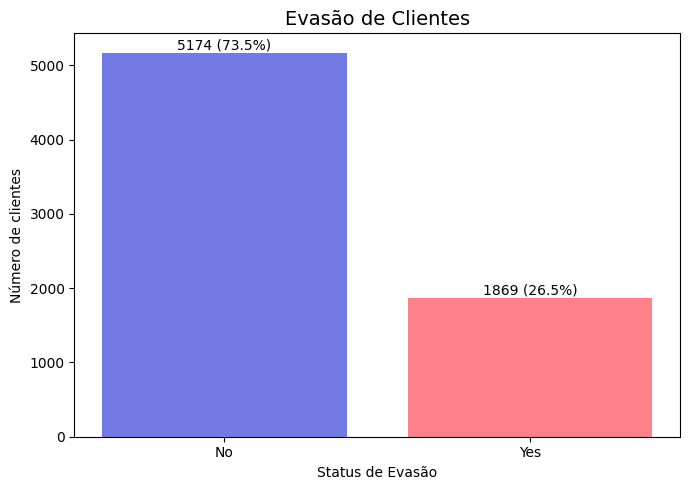

In [ ]:
# Contagem dos valores da coluna 'Evasao' no DataFrame df_dados
contagem = df_dados['Evasao'].value_counts()
labels = contagem.index
sizes = contagem.values

# Remover estilo pré-definido do Colab
plt.style.use('default')

# Cores de acordo com os labels atuais
# Ensure labels match the keys in cor_mapa
cor_mapa = {
    'No': '#747ae4',  # azul → Sem evasão
    'Yes': '#ff818a',  # vermelho → Com evasão
}
colors = [cor_mapa[label] for label in labels]

# Criar gráfico de barras
fig, ax = plt.subplots(figsize=(7, 5))
barras = ax.bar(labels, sizes, color=colors, edgecolor=None)

# Adicionar rótulos nas barras
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 0.5,  # ligeiramente acima da barra
        f'{altura} ({altura/sizes.sum():.1%})',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Título e formatação
ax.set_title('Evasão de Clientes', fontsize=14)
ax.set_ylabel('Número de clientes')
ax.set_xlabel('Status de Evasão')
plt.tight_layout()
plt.show()

**3. Contagem de Evasão por Variáveis Categóricas**

Agora, são exploradas como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

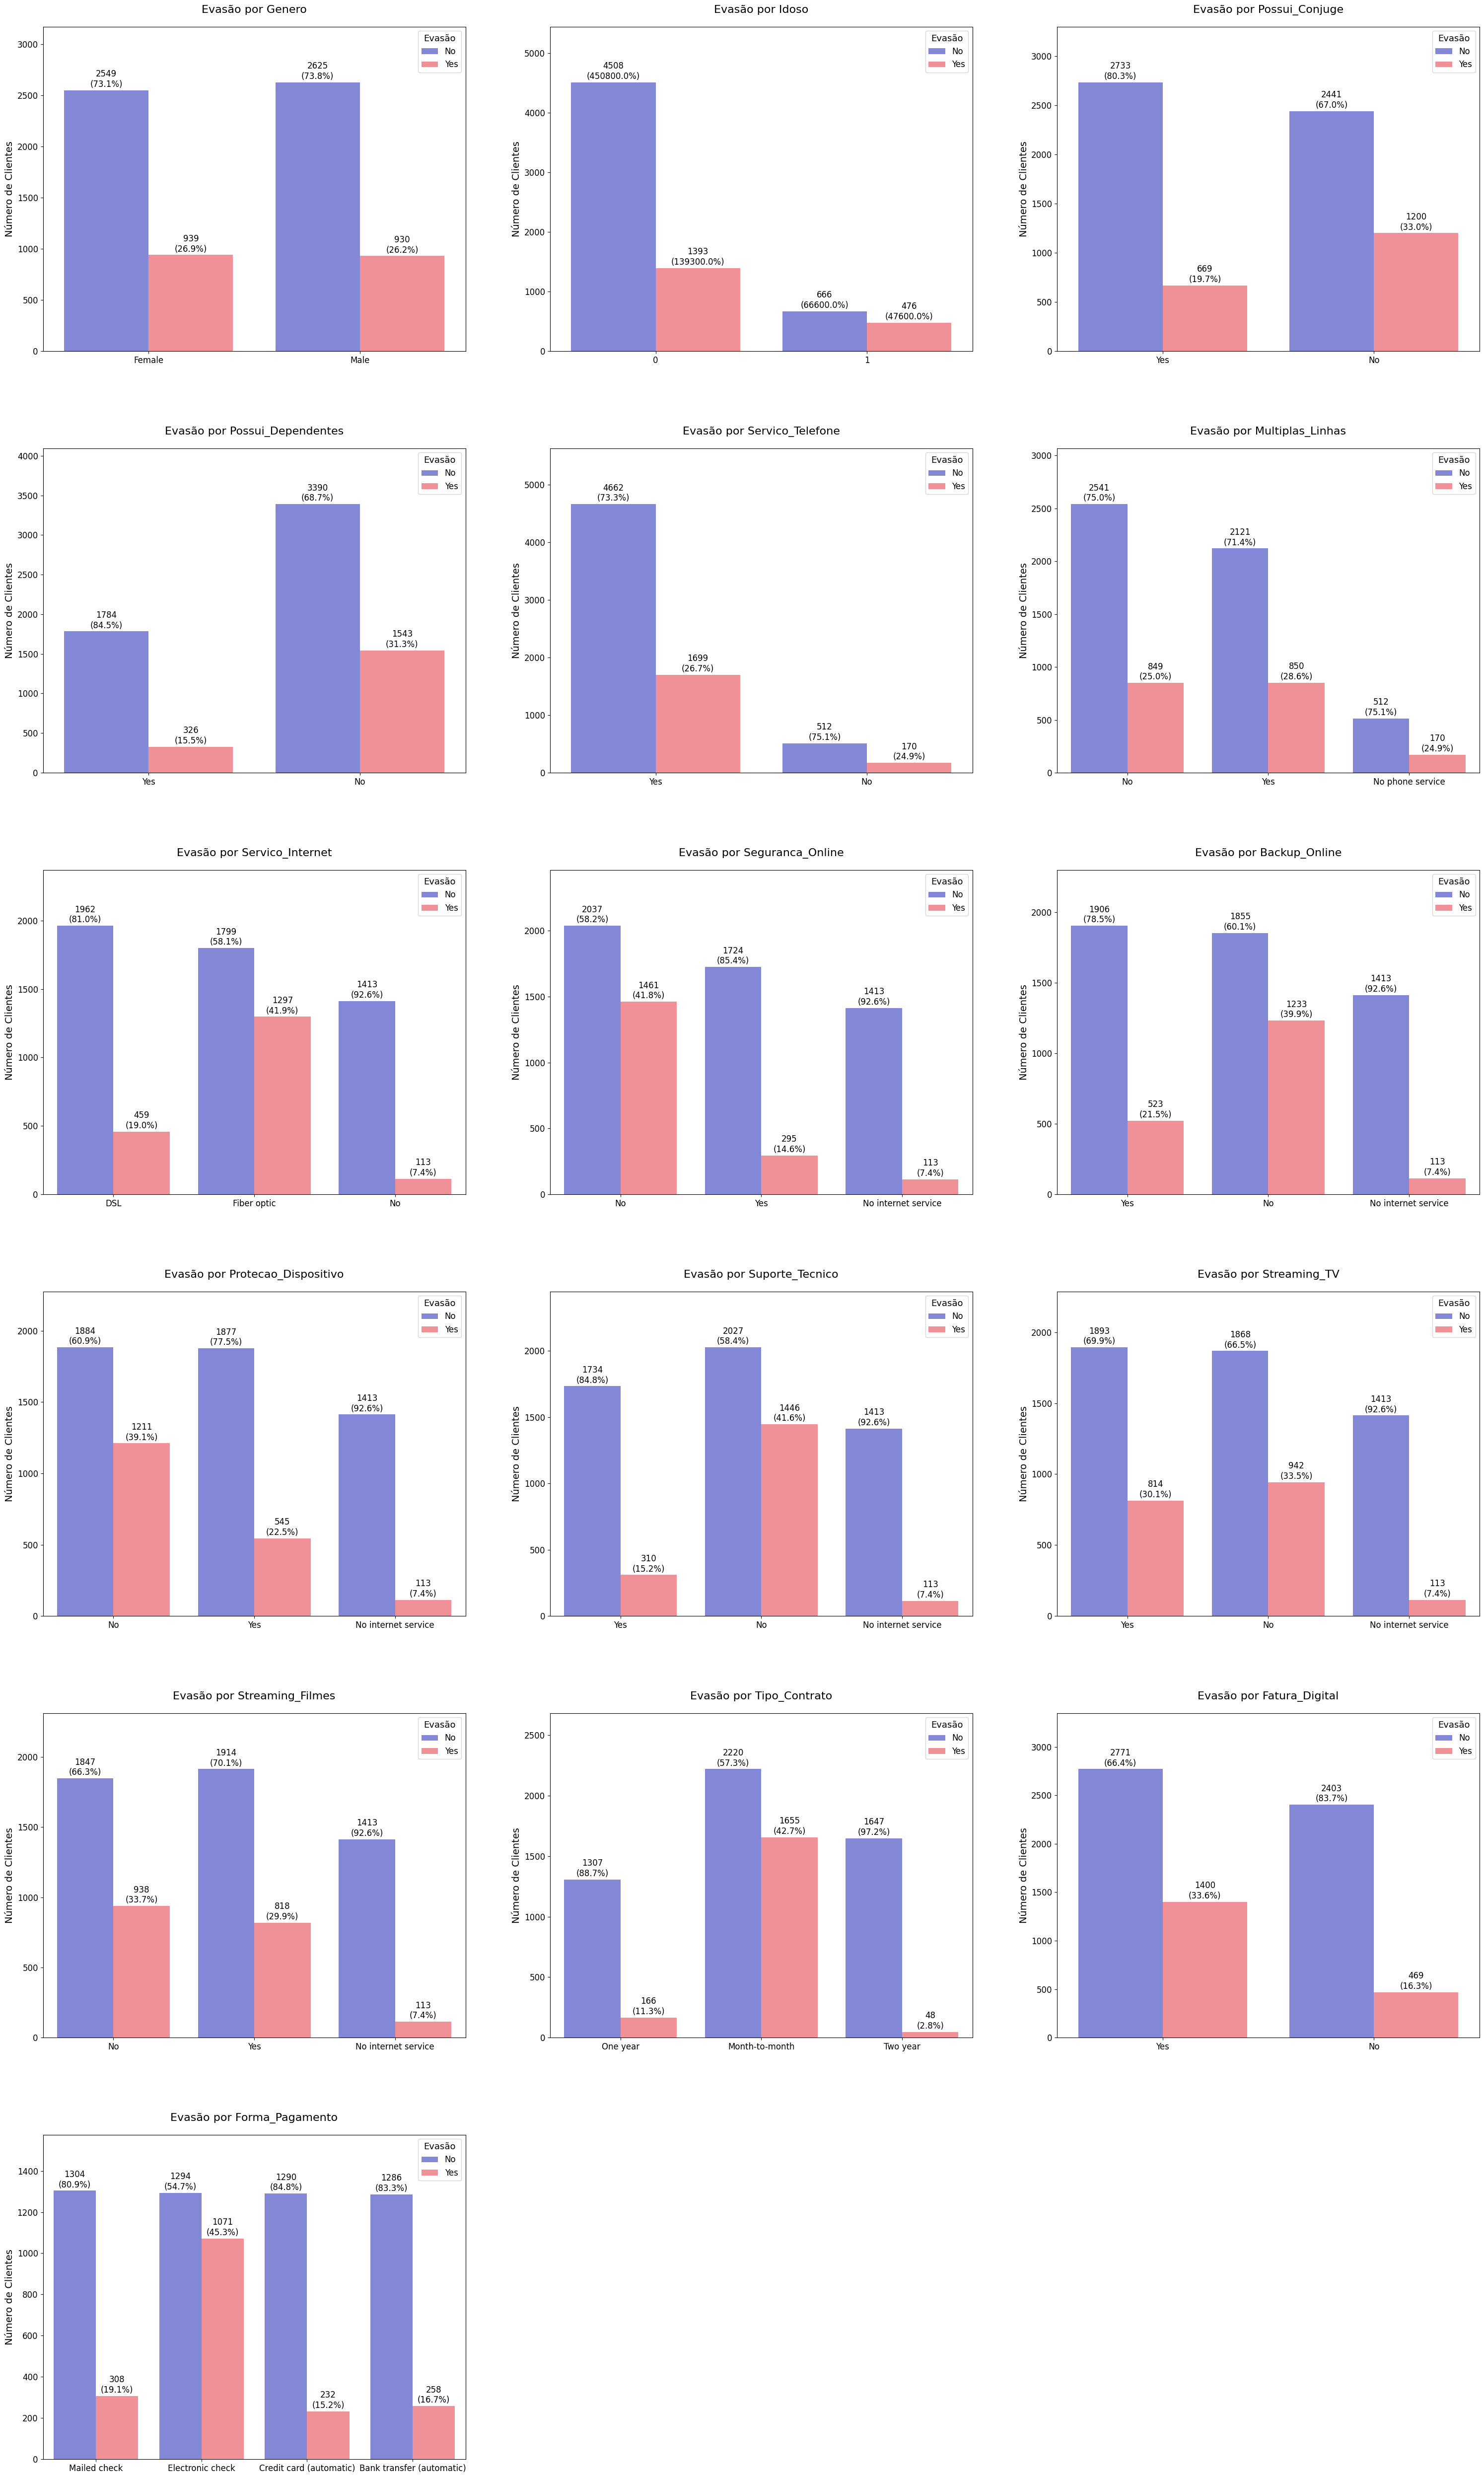

In [ ]:
# Lista de colunas categóricas
variaveis_categoricas = [
    'Genero',
    'Idoso',
    'Possui_Conjuge',
    'Possui_Dependentes',
    'Servico_Telefone',
    'Multiplas_Linhas',
    'Servico_Internet',
    'Seguranca_Online',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes',
    'Tipo_Contrato',
    'Fatura_Digital',
    'Forma_Pagamento',
]

# Paleta de cores personalizada
paleta_churn = {
    'No': '#747ae4',
    'Yes': '#ff818a',
}

# Criar subplots com 3 colunas
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(30, 50))  # 6x3 = 18 eixos
axes = axes.flatten()

# Gerar os gráficos
for i, coluna in enumerate(variaveis_categoricas):
    # Calcular totais para porcentagens
    total_por_categoria = df_dados[coluna].value_counts()

    # Criar o gráfico
    ax = sns.countplot(data=df_dados, x=coluna, hue='Evasao', palette=paleta_churn, ax=axes[i])
    axes[i].set_title(f'Evasão por {coluna}', fontsize=16, pad=20)
    axes[i].set_xlabel('', fontsize=14)
    axes[i].set_ylabel('Número de Clientes', fontsize=14)
    axes[i].tick_params(axis='x', rotation=0, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend(title='Evasão', fontsize=12, title_fontsize=13)

    # Adicionar rótulos com valores absolutos e porcentagens
    for container in ax.containers:
        # Calcular porcentagens para cada barra
        porcentagens = []
        for j, height in enumerate(container.datavalues):
            categoria = ax.get_xticklabels()[j].get_text()
            total_cat = total_por_categoria.get(categoria, 1)  # Evitar divisão por zero
            porcentagem = (height / total_cat) * 100
            porcentagens.append(f'({porcentagem:.1f}%)')

        # Criar labels combinando valores e porcentagens
        labels = [f'{int(height)}\n{perc}' for height, perc in zip(container.datavalues, porcentagens)]

        # Adicionar labels
        ax.bar_label(container,
                    labels=labels,
                    label_type='edge',
                    padding=2,
                    fontsize=12,
                    color='black')

    # Ajustar limite do eixo Y
    axes[i].set_ylim(0, ax.get_ylim()[1] * 1.15)  # Aumenta 15% no topo

# Remover eixos não utilizados
for j in range(len(variaveis_categoricas), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.2)  # Ajustar espaçamento
plt.show()

**4. Contagem de Evasão por Variáveis Numéricas**

Aqui são exploradas como variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram.

Essa análise ajuda a entender se certos valores numéricos estão mais associados à evasão, oferecendo insights sobre os fatores que influenciam o comportamento dos clientes.


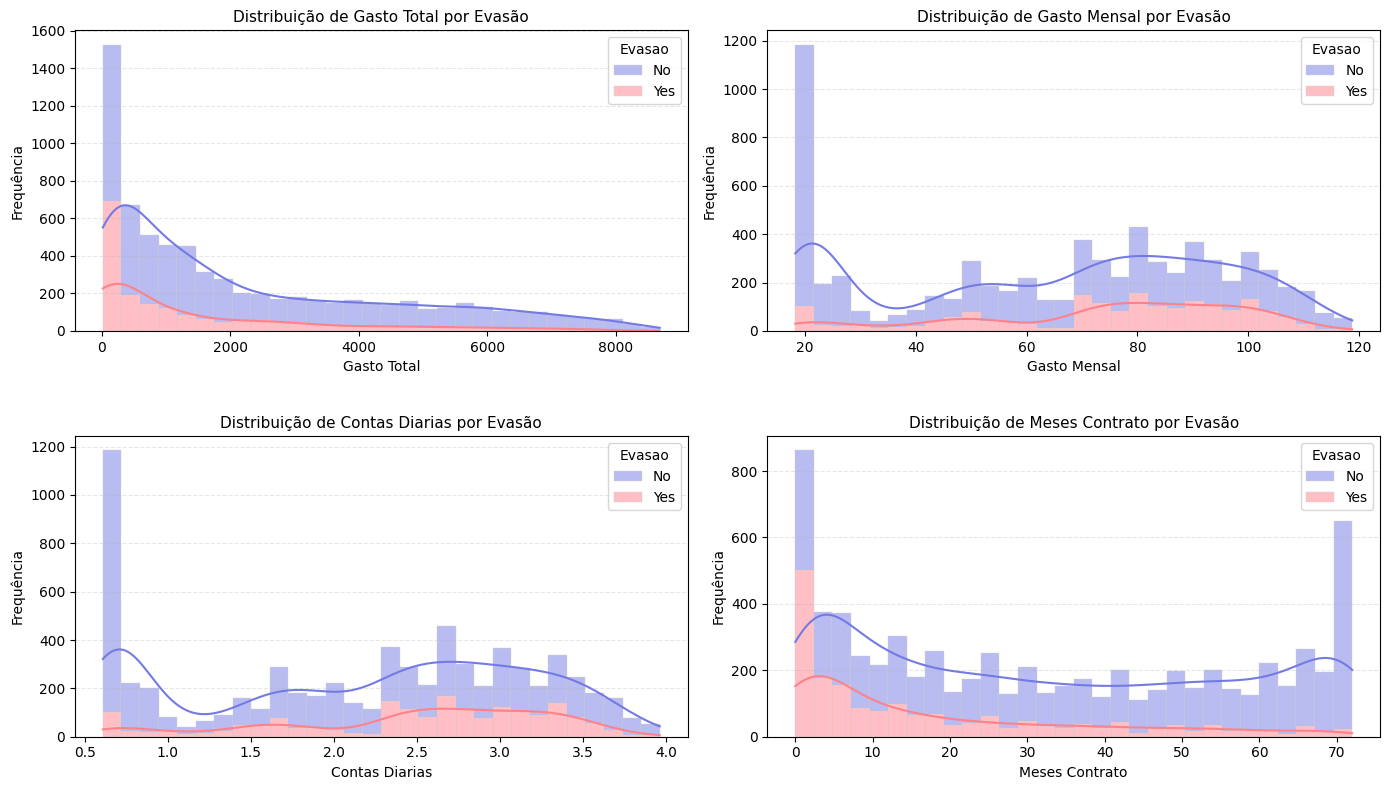

In [ ]:
# Paleta de cores personalizada
paleta = {
    'No': '#747ae4',
    'Yes': '#ff818a',
}

# Lista de variáveis numéricas
variaveis_numericas = ['Gasto_Total', 'Gasto_Mensal', 'Contas_Diarias', 'Meses_Contrato']

# Criar subplots - 2 colunas
n = len(variaveis_numericas)
ncols = 2
nrows = (n + 1) // ncols  # garante linhas suficientes
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
axes = axes.flatten()

# Plotar os gráficos
for i, var in enumerate(variaveis_numericas):
    sns.histplot(
        data=df_dados,
        x=var,
        hue='Evasao',
        multiple='stack',
        palette=paleta,
        bins=30,
        kde=True,
        edgecolor='lightgray',
        linewidth=0.3,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribuição de {var.replace("_", " ")} por Evasão', fontsize=11)
    axes[i].set_xlabel(var.replace('_', ' '))
    axes[i].set_ylabel('Frequência')
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

# Esconde gráficos vazios, se sobrar espaço
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para espaçamento entre os gráficos
plt.tight_layout(h_pad=3.0)  # h_pad ajusta o espaçamento vertical entre linhas
plt.show()


# 📈 Análise de correlação entre as variáveis

Análise de correlação pode ser muito útil na identificação de quais variáveis têm maior impacto na evasão de clientes.

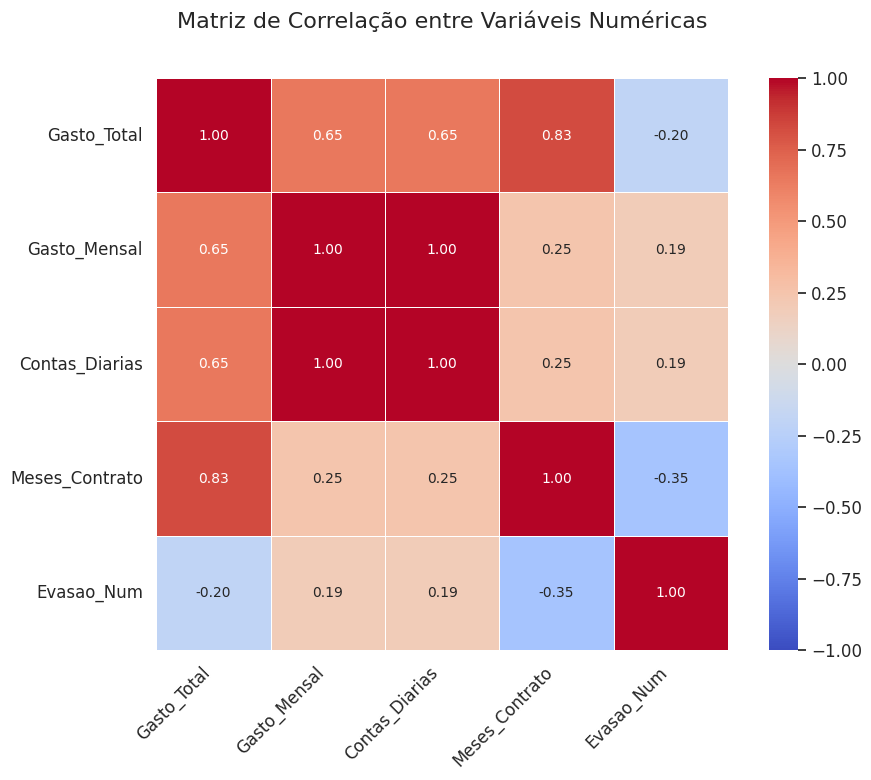

In [ ]:
# Criar cópia dos dados para análise
dados_corr = df_dados.copy()

# Transformar variáveis categóricas relevantes para numéricas (além da Evasao)
dados_corr['Evasao_Num'] = dados_corr['Evasao'].map({'Yes': 1, 'No': 0}).astype(int)

# Selecionar variáveis numéricas (incluindo as transformadas)
variaveis_numericas = [
    'Gasto_Total',
    'Gasto_Mensal',
    'Contas_Diarias',
    'Meses_Contrato',
    'Evasao_Num'
]

# Filtrar apenas colunas existentes no DataFrame
variaveis_numericas = [v for v in variaveis_numericas if v in dados_corr.columns]

# Calcular matriz de correlação com método mais robusto (Pearson padrão)
matriz_corr = dados_corr[variaveis_numericas].corr(method='pearson')

# Configurar estilo visual
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)

# Criar heatmap
ax = sns.heatmap(
    matriz_corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    square=True,
    cbar=True,
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot_kws={'size': 10}
)

# Adicionar título e rótulos
plt.title('Matriz de Correlação entre Variáveis Numéricas\n', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

ax.set_facecolor('#f5f5f5') # Adicionar grade

plt.tight_layout()
plt.show()

In [ ]:
# Correlação entre Evasão de Clientes e outras variáveis
correlacoes_churn = matriz_corr['Evasao_Num'].sort_values(key=abs, ascending=False)
print(correlacoes_churn)

Evasao_Num        1.000000
Meses_Contrato   -0.352229
Gasto_Total      -0.199484
Contas_Diarias    0.193412
Gasto_Mensal      0.193356
Name: Evasao_Num, dtype: float64


# 📝Relatorio Final

## 📄Introdução
A Telecom X está enfrentando um alto índice de cancelamentos (churn), impactando sua receita e base de clientes. Este relatório apresenta uma análise exploratória dos dados (EDA) para identificar os principais fatores associados à evasão, além de recomendações estratégicas para reduzir o problema.

---

## 🧹Limpeza e Tratamento
Foram seguidos os seguintes passos para preparar os dados para análise:

* Importação e extração de dados em JSON contendo informações de clientes (demográficas, serviços contratados, gastos e status de churn).
* Normalização dos dados
* Renomeando o título das colunas do inglês para português
* Verificação de inconsistências nos dados: valores duplicados, valores nulos, valores vazios ou em branco
* Tratamento das inconsistências
* Criação da coluna “Contas_Diarias”
* Ferramentas utilizadas: Python (Pandas, NumPy, Matplotlib, Seaborn, Plotly).

---

## 🔎Análise Exploratória
**Taxa geral de Churn:**
* 26,5% dos clientes cancelaram o serviço, enquanto 73,5% permaneceram. Isso indica uma alta rotatividade, exigindo ações imediatas.

**Variáveis categóricas associadas ao Churn:**
* **Forma de pagamento: 45,3%** de clientes que pagam com cheque eletrônico. Métodos automáticos (cartão/transferência) têm menor churn.
* **Tipo de contrato: 42,7%** de clientes que têm contrato mensal. Clientes sem compromisso de longo prazo cancelam mais.
* **Serviço de internet: 41,9%** de clientes que usam fibra ótica. Possíveis problemas de qualidade ou custo elevado.
* **Suporte técnico: 41,6%** de clientes sem suporte.
* **Segurança online: 38,1%** de clientes que não possuem segurança online. Serviços adicionais reduzem churn.

**Variáveis numéricas associadas ao Churn**:
* **Tempo de contrato**: Clientes novos são mais propensos a sair.
* **Gasto mensal**: Preços altos podem estar causando insatisfação.
* **Gasto total**: Preços altos podem estar causando insatisfação.

---

## 📈 Análise de correlação
Com base nos resultados de correlação apresentados, podemos tirar as seguintes conclusões sobre os fatores que influenciam a evasão de clientes (churn):
* Meses de Contrato (Correlação: -0.35): quanto maior o tempo de contrato, menor a probabilidade de evasão. Ou seja, cada mês adicional reduz 35% da propensão ao churn.
* Gasto Total (Correlação: -0.20): Clientes que gastaram mais ao longo do tempo têm menor tendência a cancelar. Ou seja, clientes que gastam mais são 20% mais fiéis.
* Contas Diárias e Gasto Mensal (Correlação: +0.19): Ambas mostram correlação positiva moderada com evasão. Um aumento de 10% no gasto diário propicia 1.9% mais churn. Planos caros têm 19% mais risco de cancelamento.

---

## 💡Conclusões e Insights
A taxa de churn de 26,5% revela que mais de um quarto da base de clientes está deixando o serviço, o que representa uma ameaça significativa à receita e à estabilidade da empresa. As análises indicam que o cancelamento está fortemente ligado a aspectos contratuais, forma de pagamento e serviços adicionais oferecidos.

**Principais insights:**
1.	Perfil do cliente mais propenso a cancelar
* Contrato mensal e pagamento por cheque eletrônico estão associados às maiores taxas de churn.
* Clientes novos e com planos de internet de fibra óptica apresentam maior evasão, possivelmente devido a expectativas não atendidas ou custo elevado.
2.	Impacto de serviços adicionais
* A ausência de segurança online e suporte técnico está diretamente relacionada ao aumento do churn. Serviços complementares parecem contribuir para a fidelização.
3.	Sensibilidade ao preço
* Gasto mensal mais alto aumenta a chance de cancelamento (+19% de risco). Isso sugere que planos mais caros precisam agregar mais valor percebido ou oferecer benefícios extras.
* Em contrapartida, gasto total acumulado ao longo do tempo está negativamente correlacionado com churn (-20%), indicando que clientes antigos e de alto valor tendem a permanecer.
4.	Efeito do tempo de relacionamento
* A variável meses de contrato tem a maior correlação negativa (-35%) com a evasão: quanto mais tempo o cliente permanece, menor a probabilidade de sair. Estratégias de engajamento nos primeiros meses são críticas.

---

## ✅Recomendações
Com base nos insights, recomenda-se:
* Incentivar contratos de longo prazo com benefícios claros (descontos, upgrades de serviço).
* Migrar clientes do cheque eletrônico para métodos de pagamento automáticos.
* Revisar a qualidade e custo dos planos de fibra óptica.
* Oferecer pacotes com segurança online e suporte técnico como padrão ou a baixo custo para novos clientes.
* Criar um programa de retenção nos primeiros meses, quando a propensão ao churn é maior.



